<a href="https://colab.research.google.com/github/akkipant/CS5542-Big-Data-Analytics-and-Applications/blob/master/ICP-7/Source/BDA_ICP_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [123]:
# reading the data and looking at the first five rows of the data
data=pd.read_csv("nba_2016_2017_100.csv")
data.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,OFF_RATING,DEF_RATING,NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,PACE,PIE,FGM,FGA,FGM_PG,FGA_PG,FG_PCT,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,OFF_RATING_RANK,DEF_RATING_RANK,NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,USG_PCT_RANK,PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK,CFID,CFPARAMS,WIKIPEDIA_HANDLE,TWITTER_HANDLE,SALARY_MILLIONS,PTS,ACTIVE_TWITTER_LAST_YEAR,TWITTER_FOLLOWER_COUNT_MILLIONS
0,201566,Russell Westbrook,1610612760,OKC,28,81,46,35,0.568,34.6,107.9,104.6,3.3,0.543,1.92,23.4,0.053,0.279,0.167,12.2,0.476,0.554,0.408,102.31,0.230,824,1941,10.2,24.0,0.425,18,62,330,143,22,115,168,95,1,140,96,171,22,53,358,339,181,2,47,1,1,1,2,1,293,5,"2,015,661,610,612,760",Russell_Westbrook,russwest44,26.54,31.6,1,4.500
1,1626246,Boban Marjanovic,1610612765,DET,28,35,16,19,0.457,8.4,104.3,102.4,1.9,0.054,0.90,5.1,0.166,0.313,0.239,5.7,0.545,0.606,0.248,97.20,0.196,72,132,2.1,3.8,0.545,365,345,149,270,432,260,82,139,412,381,467,4,8,5,30,100,52,63,328,2,344,360,306,356,47,5,"16,262,461,610,612,700",Boban_Marjanovi_,0,7.00,5.5,0,0.000
2,1627743,Demetrius Jackson,1610612738,BOS,22,5,1,4,0.200,3.4,124.2,117.8,6.3,0.300,0.00,31.1,0.091,0.118,0.103,0.0,0.875,0.753,0.172,87.46,0.194,3,4,0.6,0.8,0.750,458,464,34,468,475,2,475,53,32,466,28,81,317,201,1,2,4,279,483,3,461,476,458,480,3,5,"16,277,431,610,612,700",Demetrius_Jackson,d_jay11,1.45,2.0,1,0.049
3,203076,Anthony Davis,1610612740,NOP,24,75,31,44,0.413,36.1,104.2,102.5,1.7,0.110,0.87,7.3,0.067,0.269,0.170,8.4,0.518,0.580,0.326,100.19,0.192,770,1526,10.3,20.3,0.505,111,196,419,316,9,271,88,144,230,387,442,139,27,48,129,189,112,9,121,4,3,5,1,3,95,5,"2,030,761,610,612,740",Anthony_Davis_(basketball),antdavis23,22.12,28.0,1,1.220
4,201935,James Harden,1610612745,HOU,27,81,54,27,0.667,36.4,113.6,107.3,6.3,0.505,1.95,27.6,0.035,0.212,0.123,14.1,0.525,0.613,0.341,102.98,0.190,674,1533,8.3,18.9,0.440,18,15,221,56,7,27,296,55,2,132,48,242,73,144,426,167,40,7,34,5,10,4,15,9,253,5,"2,019,351,610,612,740",James_Harden,jharden13,26.50,29.1,1,4.470


Selecting limited columns from the dataset to get better clusters

In [124]:
data = data[['AGE', 'OFF_RATING', 'DEF_RATING', 'PTS', 'SALARY_MILLIONS']]

Scaling the Data as it helps with better clustering result as the original data has a wide magnitude and after scaling it will all be of the same magnitude.

In [135]:
data

,AGE,OFF_RATING,DEF_RATING,PTS,SALARY_MILLIONS
0,28,107.9,104.6,31.6,26.54
1,28,104.3,102.4,5.5,7.00
2,22,124.2,117.8,2.0,1.45
3,24,104.2,102.5,28.0,22.12
4,27,113.6,107.3,29.1,26.50
...,...,...,...,...,...
95,26,103.6,111.2,5.0,1.05
96,24,104.3,105.5,16.0,16.00
97,22,103.1,113.3,13.2,3.28
98,20,101.5,110.9,5.1,1.31


In [125]:
# standardizing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [126]:
data_scaled = pd.DataFrame(data_scaled, columns= data.columns)

In [136]:
data_scaled

,AGE,OFF_RATING,DEF_RATING,PTS,SALARY_MILLIONS,cluster
0,0.421053,0.564171,0.458498,1.000000,0.855791,0
1,0.421053,0.467914,0.371542,0.132890,0.218271,1
2,0.105263,1.000000,0.980237,0.016611,0.037194,4
3,0.210526,0.465241,0.375494,0.880399,0.711582,0
4,0.368421,0.716578,0.565217,0.916944,0.854486,0
...,...,...,...,...,...,...
95,0.315789,0.449198,0.719368,0.116279,0.024144,4
96,0.210526,0.467914,0.494071,0.481728,0.511909,2
97,0.105263,0.435829,0.802372,0.388704,0.096900,4
98,0.000000,0.393048,0.707510,0.119601,0.032626,4


#Now taking the Scaled data and using that to plot the inertia and the use elbow method to find the number of clusters

Text(0, 0.5, 'Inertia')

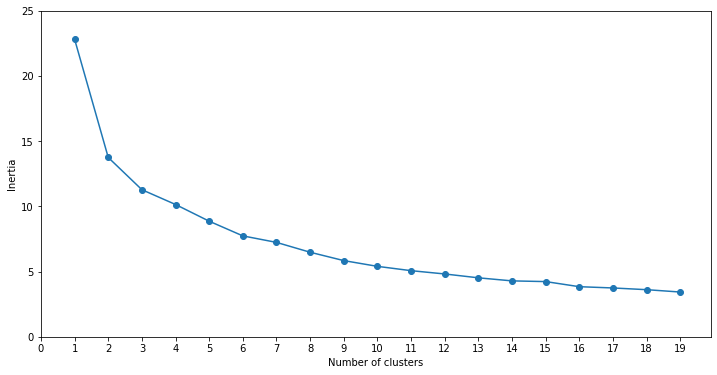

In [127]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xticks(range(20))
plt.yticks(range(0,30, 5))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

##Using the elbow method I found out the 4 best value for the number of clusters, so let's do kmeans and store the predicted classes for further plotting.

In [53]:
clusters = [3,4,5,6,7]
pred = []

In [54]:
#Storing all the cluster predictions for further plotting
for cluster in clusters:
  kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
  kmeans.fit(data_scaled)
  pred.append(kmeans.predict(data_scaled))

Let's now plot these clusters on a scatter plot.

#Scatter Plot for 3 clusters

In [128]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred[0]

In [129]:
frame['cluster'].unique()

array([2, 0, 1], dtype=int32)

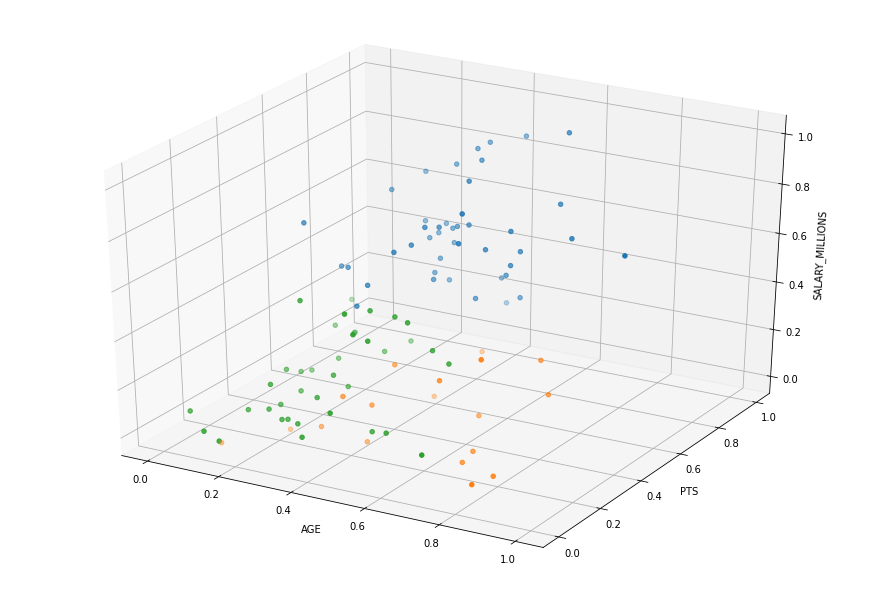

In [130]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
for i in frame['cluster'].unique():
  ax.scatter(frame[frame.cluster==i]['AGE'], frame[frame.cluster==i]['PTS'], frame[frame.cluster==i]['SALARY_MILLIONS'])
  ax.set_xlabel('AGE')
  ax.set_ylabel('PTS')
  ax.set_zlabel('SALARY_MILLIONS')

#Scatter Plot for 4 clusters

In [131]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred[1]

In [59]:
frame['cluster'].unique()

array([3, 2, 1, 0], dtype=int32)

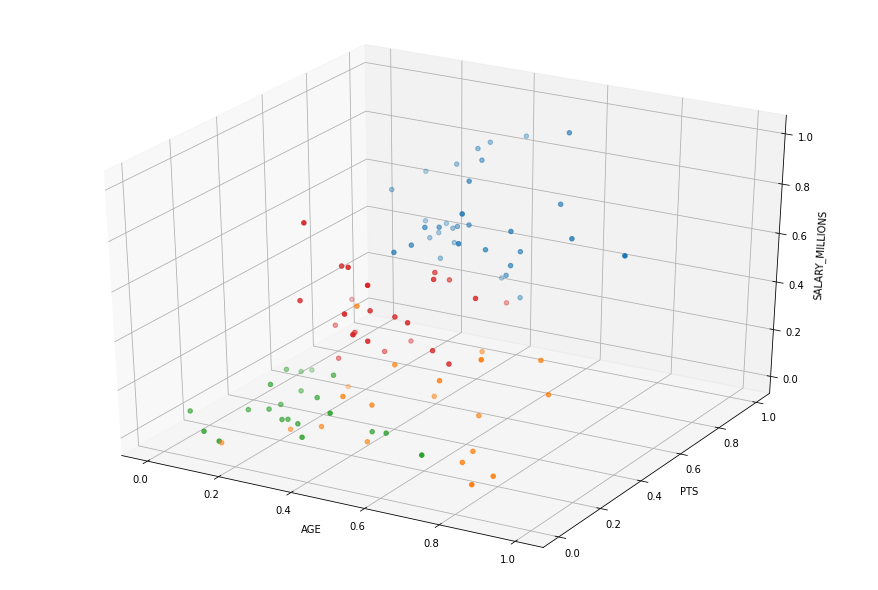

In [60]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
for i in frame['cluster'].unique():
  ax.scatter(frame[frame.cluster==i]['AGE'], frame[frame.cluster==i]['PTS'], frame[frame.cluster==i]['SALARY_MILLIONS'])
  ax.set_xlabel('AGE')
  ax.set_ylabel('PTS')
  ax.set_zlabel('SALARY_MILLIONS')

#Scatter Plot for 5 clusters

In [132]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred[2]

In [62]:
frame['cluster'].unique()

array([1, 4, 2, 3, 0], dtype=int32)

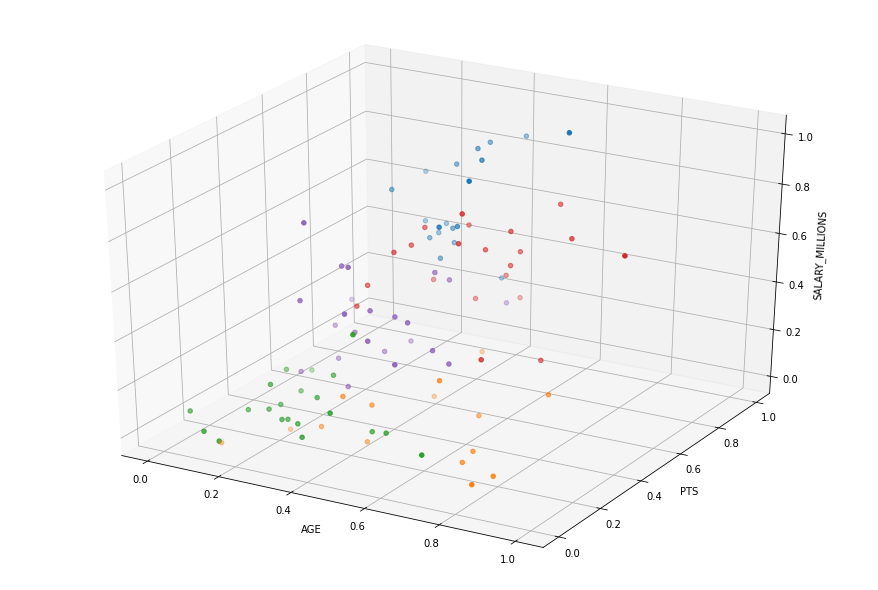

In [63]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
for i in frame['cluster'].unique():
  ax.scatter(frame[frame.cluster==i]['AGE'], frame[frame.cluster==i]['PTS'], frame[frame.cluster==i]['SALARY_MILLIONS'])
  ax.set_xlabel('AGE')
  ax.set_ylabel('PTS')
  ax.set_zlabel('SALARY_MILLIONS')

#Scatter Plot for 6 clusters

In [133]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred[3]

In [65]:
frame['cluster'].unique()

array([0, 1, 5, 4, 2, 3], dtype=int32)

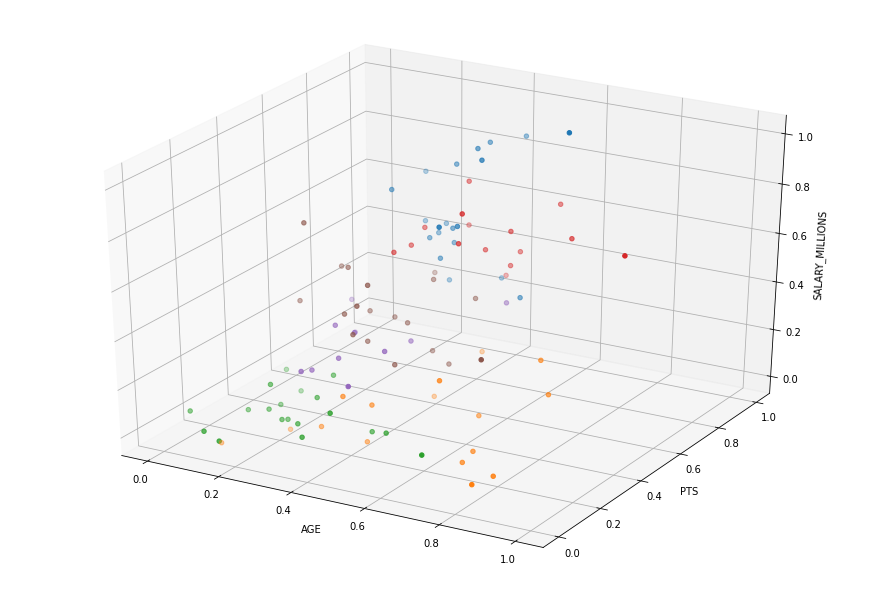

In [66]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
for i in frame['cluster'].unique():
  ax.scatter(frame[frame.cluster==i]['AGE'], frame[frame.cluster==i]['PTS'], frame[frame.cluster==i]['SALARY_MILLIONS'])
  ax.set_xlabel('AGE')
  ax.set_ylabel('PTS')
  ax.set_zlabel('SALARY_MILLIONS')

#Scatter Plot for 7 clusters

In [134]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred[4]

In [68]:
frame['cluster'].unique()

array([0, 1, 4, 3, 5, 2, 6], dtype=int32)

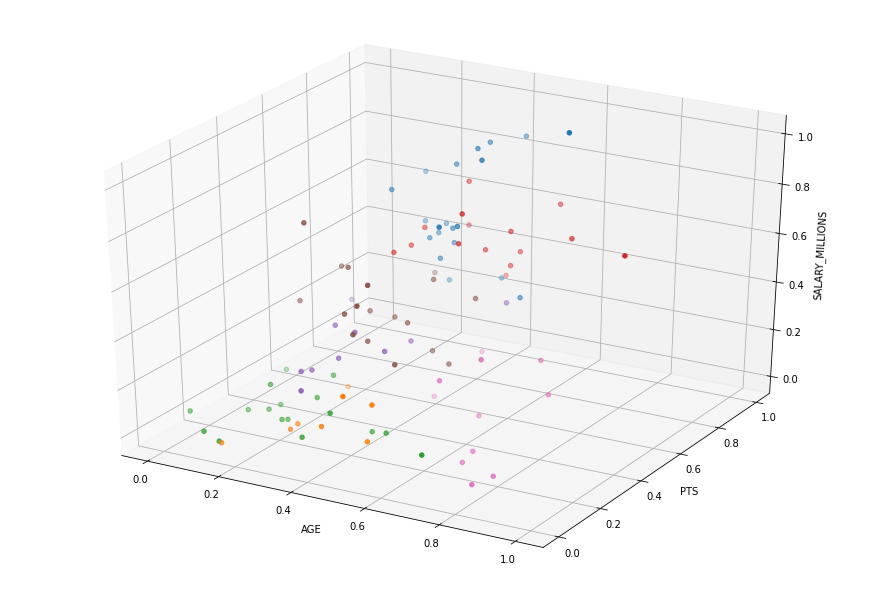

In [69]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
for i in frame['cluster'].unique():
  ax.scatter(frame[frame.cluster==i]['AGE'], frame[frame.cluster==i]['PTS'], frame[frame.cluster==i]['SALARY_MILLIONS'])
  ax.set_xlabel('AGE')
  ax.set_ylabel('PTS')
  ax.set_zlabel('SALARY_MILLIONS')

# Let us now try applying KMeans on a different dataset

In [101]:
from sklearn.datasets import load_iris
%matplotlib inline

Using the Iris Dataset, this dataset contains 3 different classes of flowers 

In [102]:
#Loading the dataset from scikit learn library
iris = load_iris()

In [103]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [119]:
df['flower'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,flower
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0


In [120]:
df_copy = df

In [106]:
df.drop(['flower'],axis='columns',inplace=True)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [107]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

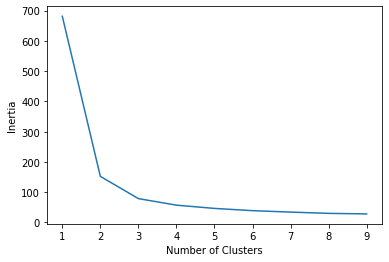

In [108]:
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.plot(k_rng,sse)

We see by using elbow method that 3 is the elbow point so taking k = 3

In [109]:
km = KMeans(n_clusters=3)
yp = km.fit_predict(df)

In [110]:
df['cluster'] = yp
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1


In [111]:
df.cluster.unique()

array([1, 2, 0], dtype=int32)

In [112]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

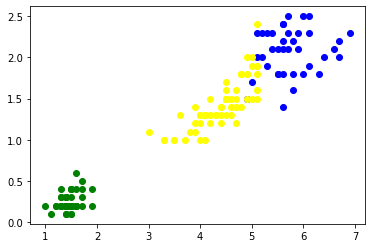

In [113]:
#Plot for cluster by kmeans
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')

In [121]:
df_copy1 = df_copy[df_copy.flower==0]
df_copy2 = df_copy[df_copy.flower==1]
df_copy3 = df_copy[df_copy.flower==2]

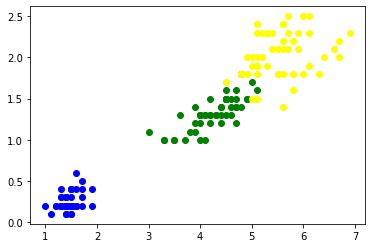

In [118]:
#Original clusters
plt.scatter(df_copy1['petal length (cm)'],df_copy1['petal width (cm)'],color='blue')
plt.scatter(df_copy2['petal length (cm)'],df_copy2['petal width (cm)'],color='green')
plt.scatter(df_copy3['petal length (cm)'],df_copy3['petal width (cm)'],color='yellow')

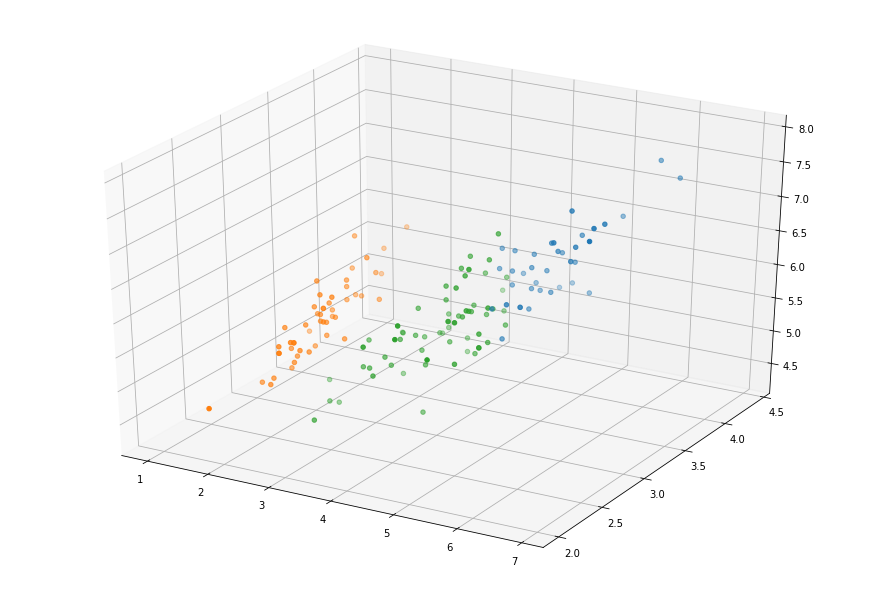

In [116]:
#Clusters predicted by the KMeans Algorithm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
ax.scatter(df1['petal length (cm)'],df1['sepal width (cm)'], df1['sepal length (cm)'])
ax.scatter(df2['petal length (cm)'],df2['sepal width (cm)'], df2['sepal length (cm)'])
ax.scatter(df3['petal length (cm)'],df3['sepal width (cm)'], df3['sepal length (cm)'])

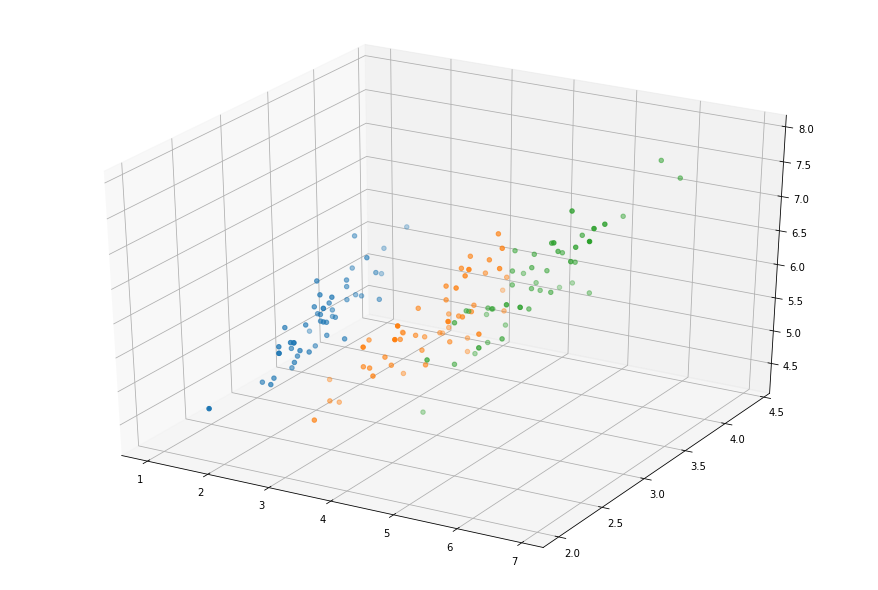

In [117]:
#Original classes for the flowers
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
ax.scatter(df_copy1['petal length (cm)'],df_copy1['sepal width (cm)'], df_copy1['sepal length (cm)'])
ax.scatter(df_copy2['petal length (cm)'],df_copy2['sepal width (cm)'], df_copy2['sepal length (cm)'])
ax.scatter(df_copy3['petal length (cm)'],df_copy3['sepal width (cm)'], df_copy3['sepal length (cm)'])